In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


### About Dataset
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Importing Necessary Libraries**¶


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Dataset

In [3]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Workflow
Step 1 - Understanding data
- Understanding data 
- Basic info
- columns types
- Stats summary

Step 2 - Cleaning and Transforming data 
- checking missing values
- Using feature engeneering - Changing Dtypes if required
                            - Adding new columns
                            - Deleting unecessary columns\
                            
Step 3 Checking correlation 

Step 4 Necessary Insights


### Step 1 - Understanding data

In [4]:
df.shape ## there are 1000 rows  17 columns

(1000, 17)

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### We can see date and time is in object so we have to change it in datetime64 to get more insight of the data 

In [7]:
### Checking null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### There is no null values 

In [8]:
## Checking duplicates 
df.duplicated().sum()

0

### There is no duplicates 

In [9]:
df.describe().T ## for checking outliers in the data 


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


### Step 2 - Cleaning and Transforming data 


In [10]:
from datetime import datetime as dt 
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
df["Time"]=pd.to_datetime(df["Time"])

In [12]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

## Changing Dtypes of Date and Time and checking it 

In [13]:
## Adding necesaary columns 
df['month'] = df['Date'].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["weekday"]=df.Date.dt.weekday
df




,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,Friday,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2023-01-16 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January,Tuesday,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2023-01-16 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,March,Saturday,5
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-01-16 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February,Saturday,5
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-01-16 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February,Friday,4


### We can check month, day and weekday has added

In [14]:
## Deleting invoice id as well as branch as it is similar to city 
df.drop(columns=["Invoice ID","Branch"],inplace=True)



In [15]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,Friday,4
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,6
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,6
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2023-01-16 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January,Tuesday,1
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2023-01-16 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,March,Saturday,5
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-01-16 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February,Saturday,5
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-01-16 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February,Friday,4


### Hence we have drop Invoice ID and Branch columns 

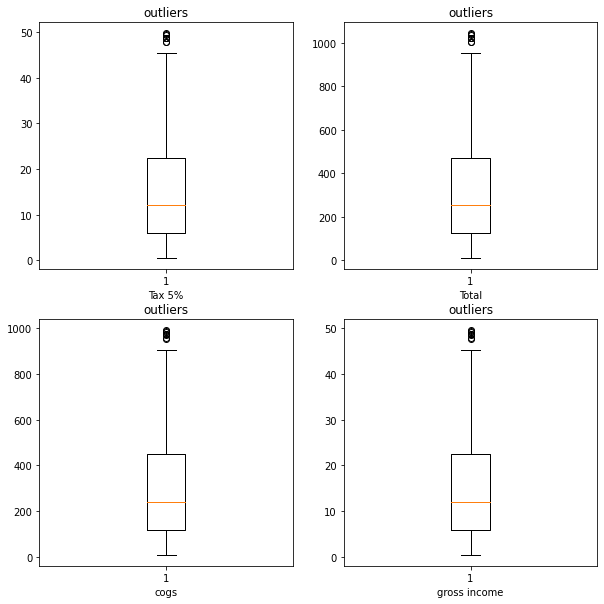

In [16]:
## Checking outliers using Boxplot
l=["Tax 5%","Total","cogs","gross income"]
pos=1
plt.figure(figsize=(10,10))
for i in l:
    
    plt.subplot(2,2,pos)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.title("outliers")
    pos=pos+1

### There is a strong relation between these columns as we can see in correlation

## Step 3 - Checking correlation

In [17]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,weekday
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.007040
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.054770
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.013879
weekday,-0.007040,0.054770,0.038809,0.038809,0.038809,NaN,0.038809,-0.013879,1.000000


<AxesSubplot:>

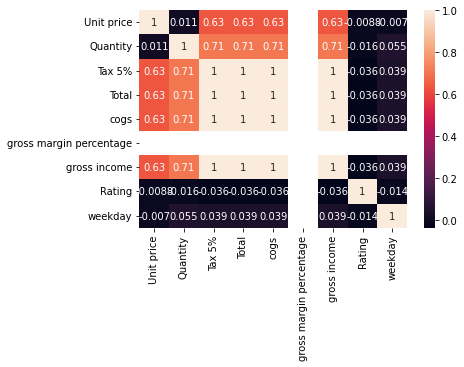

In [18]:
sns.heatmap(df.corr(),annot=True)

### We can see there is strong relation between Tax 5%, Total, cogs and gross income

In [19]:
## Checking uniques
for i in df.columns:
    print(i,"----",df[i].unique())

City ---- ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type ---- ['Member' 'Normal']
Gender ---- ['Female' 'Male']
Product line ---- ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Unit price ---- [74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 78.31 20.38 99.19 96.68 19.25 80.36 48.91
 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16 87.87
 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13 33.98
 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.

### Step 4 Necessary Insights


In [20]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,Friday,4
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,6
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,6
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,4


In [21]:
### Checking total gross income for all months
print("Total gross income is  ",df["gross income"].sum())

Total gross income is   15379.368999999999


<AxesSubplot:xlabel='gross income', ylabel='month'>

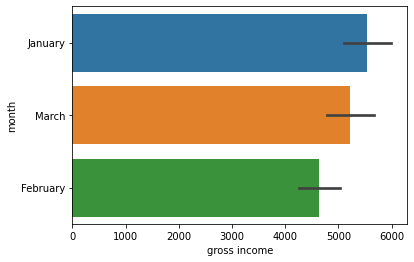

In [22]:
sns.barplot(x="gross income",y="month",data=df,estimator=sum)

### Total gross income is   15379.368999999999 for all the 3 months 


In [23]:
## Most populated product line
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='count'>

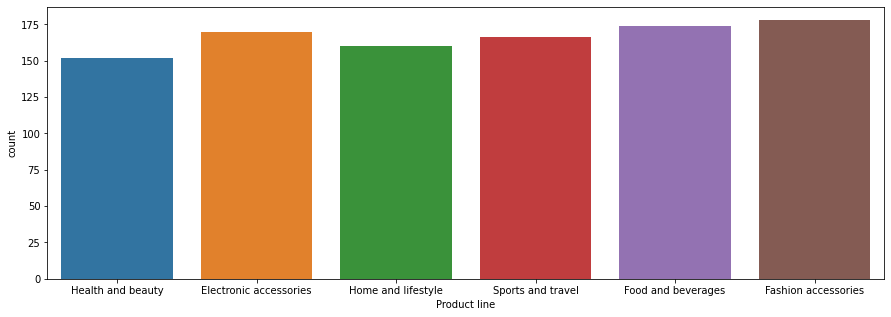

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x="Product line",data=df)


### Fashion accessories are most populated 

In [25]:
### which city has the more gross income 
df.groupby("City")["gross income"].agg(["max","min","mean","sum"])

,max,min,mean,sum
City,,,,
Mandalay,48.69,0.8875,15.232024,5057.0320
Naypyitaw,49.65,0.5085,16.052367,5265.1765
Yangon,49.49,0.6045,14.874001,5057.1605


Text(0.5, 1.0, 'total gross income')

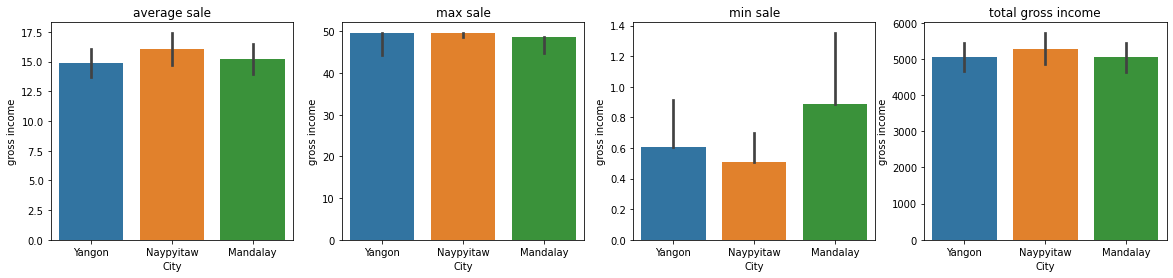

In [26]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x="City",y="gross income",data=df)
plt.title("average sale")
plt.subplot(1,4,2)
sns.barplot(x="City",y="gross income",data=df,estimator=max)
plt.title("max sale")
plt.subplot(1,4,3)
sns.barplot(x="City",y="gross income",data=df,estimator=min)
plt.title("min sale")
plt.subplot(1,4,4)
sns.barplot(x="City",y="gross income",data=df,estimator=sum)
plt.title("total gross income")

## Highest gross income was recorded at Naypyitaw city


In [27]:
## which product line as more gross income
df.groupby("Product line")["gross income"].sum().sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

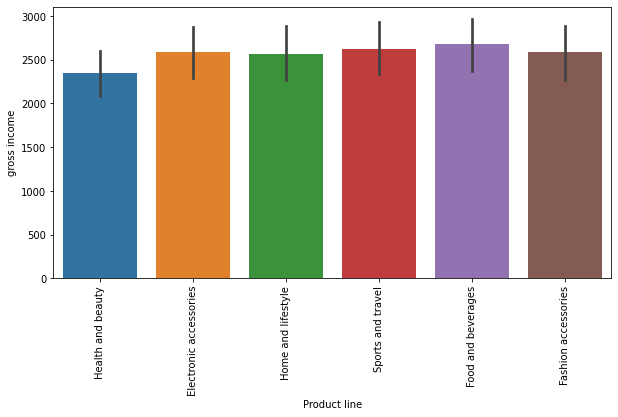

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x="Product line",y="gross income",data=df,estimator=sum)
plt.xticks(rotation=90);

### Food and beverages  has    2673.5640 which is more than other product lines

In [29]:
## which gender has bought the highest product line
df.groupby("Gender")["Product line"].value_counts().sort_values(ascending=False)

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
Male    Health and beauty         88
        Electronic accessories    86
Female  Electronic accessories    84
Male    Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
Female  Home and lifestyle        79
Male    Sports and travel         78
Female  Health and beauty         64
Name: Product line, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

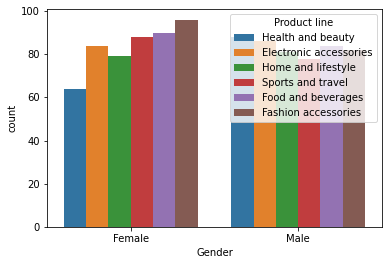

In [30]:
sns.countplot(x="Gender",hue="Product line",data=df)

In [31]:
## which customer type are frequent member or normal
df["Customer type"].value_counts()


Member    501
Normal    499
Name: Customer type, dtype: int64

## Almost 50% are Members and 50% normal 

In [32]:
### Which product line was most bought by the Members 
df[df["Customer type"]=="Member"]["Product line"].value_counts().sort_values(ascending=False)

Food and beverages        94
Sports and travel         87
Fashion accessories       86
Home and lifestyle        83
Electronic accessories    78
Health and beauty         73
Name: Product line, dtype: int64

In [33]:
df[df["Customer type"]=="Normal"]["Product line"].value_counts().sort_values(ascending=False)

Electronic accessories    92
Fashion accessories       92
Food and beverages        80
Sports and travel         79
Health and beauty         79
Home and lifestyle        77
Name: Product line, dtype: int64

### Food and beverages are most bought by the Members whereas Electronic accessories were most bought by the Normal 

<AxesSubplot:xlabel='month', ylabel='gross income'>

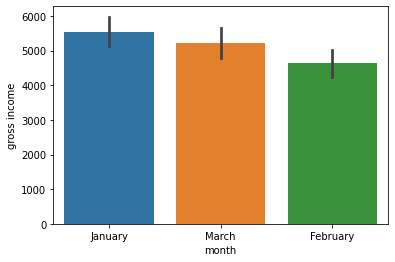

In [34]:
### Which is the Highest gross income month 
sns.barplot(x="month",y="gross income",data=df,estimator=sum)

In [35]:
df.groupby("month")["gross income"].sum().sort_values(ascending=False)

month
January     5537.708
March       5212.167
February    4629.494
Name: gross income, dtype: float64

### January has more gross income 

In [36]:
## At which date and month highest gross income was recorded along with customer category and customer type and product category at city Yangon
df_Yangon=df[df["City"]=="Yangon"]
df_Yangon[df_Yangon["gross income"]==df_Yangon["gross income"].max()][["City","Date","Customer type","Product line","month"]]

,City,Date,Customer type,Product line,month
167,Yangon,2019-02-08,Normal,Fashion accessories,February


In [37]:
## At which date and month highest gross income was recorded along with customer category and customer type and product category at city Naypyitaw
df_Naypyitaw=df[df["City"]=="Naypyitaw"]
df_Naypyitaw[df_Naypyitaw["gross income"]==df_Naypyitaw["gross income"].max()][["City","Date","Customer type","Product line","month"]]

,City,Date,Customer type,Product line,month
350,Naypyitaw,2019-02-15,Member,Fashion accessories,February


In [38]:
## At which date and month highest gross income was recorded along with customer category and customer type and product category at city Mandalay
df_Mandalay=df[df["City"]=="Mandalay"]
df_Mandalay[df_Mandalay["gross income"]==df_Mandalay["gross income"].max()][["City","Date","Customer type","Product line","month"]]

,City,Date,Customer type,Product line,month
996,Mandalay,2019-03-02,Normal,Home and lifestyle,March


In [39]:
## At which date and month lowest gross income was recorded along with customer category and customer type and product category at city Yangon
df_Yangon[df_Yangon["gross income"]==df_Yangon["gross income"].min()][["City","gross income","Date","Customer type","Product line","month"]]

,City,gross income,Date,Customer type,Product line,month
629,Yangon,0.6045,2019-01-26,Normal,Fashion accessories,January


In [40]:
## At which date and month Lowest gross income was recorded along with customer category and customer type and product category at city Naypyitaw
df_Naypyitaw=df[df["City"]=="Naypyitaw"]
df_Naypyitaw[df_Naypyitaw["gross income"]==df_Naypyitaw["gross income"].min()][["City","Date","Customer type","Product line","month"]]

,City,Date,Customer type,Product line,month
822,Naypyitaw,2019-02-07,Member,Sports and travel,February


In [41]:
## At which date and month Lowest gross income was recorded along with customer category and customer type and product category at city Mandalay
df_Mandalay=df[df["City"]=="Mandalay"]
df_Mandalay[df_Mandalay["gross income"]==df_Mandalay["gross income"].min()][["City","Date","Customer type","Product line","month"]]

,City,Date,Customer type,Product line,month
808,Mandalay,2019-01-14,Normal,Health and beauty,January


In [42]:
## what is the total gross income in each month of every city
df.groupby(["City","month"])["gross income"].sum().sort_values(ascending=False)


City       month   
Naypyitaw  January     1925.4610
Yangon     January     1841.9585
           March       1793.2915
Naypyitaw  March       1771.3830
Mandalay   January     1770.2885
           March       1647.4925
           February    1639.2510
Naypyitaw  February    1568.3325
Yangon     February    1421.9105
Name: gross income, dtype: float64

<AxesSubplot:xlabel='gross income', ylabel='City'>

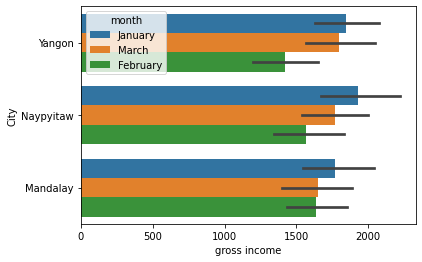

In [43]:
sns.barplot(x="gross income",y="City",hue="month",data=df,estimator=sum)

In [44]:
## what is the weekday and weekend total gross income
week_df=df[df["weekday"]<5]
weekend_df=df[df["weekday"]>=5]
print("weekdays sale : ",week_df["gross income"].sum())
print("weekends sale : ",weekend_df["gross income"].sum())


weekdays sale :  10589.907000000001
weekends sale :  4789.4619999999995


### Weekdays has more Gross income than weekends

In [45]:
### find the weekday and weekend total gross income of each city
week_df.groupby("City")["gross income"].sum().sort_values(ascending=False)

City
Naypyitaw    3593.428
Mandalay     3547.520
Yangon       3448.959
Name: gross income, dtype: float64

In [46]:
weekend_df.groupby("City")["gross income"].sum().sort_values(ascending=False)

City
Naypyitaw    1671.7485
Yangon       1608.2015
Mandalay     1509.5120
Name: gross income, dtype: float64

Text(0, 0.5, 'sale')

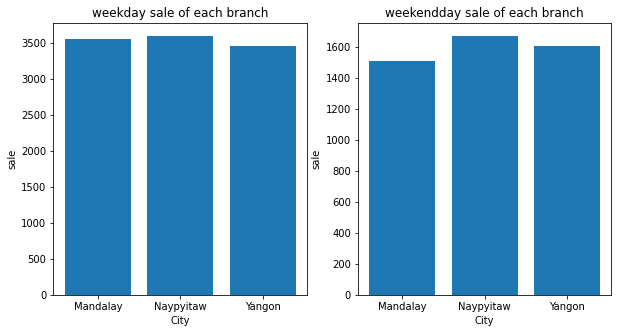

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(week_df.groupby(["City"])["gross income"].sum().index,week_df.groupby(["City"])["gross income"].sum().values)
plt.title("weekday sale of each branch")
plt.xlabel("City")
plt.ylabel("sale")
plt.subplot(1,2,2)
plt.bar(weekend_df.groupby(["City"])["gross income"].sum().index,weekend_df.groupby(["City"])["gross income"].sum().values)
plt.title("weekendday sale of each branch")
plt.xlabel("City")
plt.ylabel("sale")

In [48]:
## find the weekday and weekend sale of each month of each branch 
week_t=df[df["weekday"]<5]
weekend_t=df[df["weekday"]>=5]
print("weekdays sale : ",week_t.groupby("month")["gross income"].sum().sort_values(ascending=False))
print("weekends sale : ",weekend_t.groupby("month")["gross income"].sum().sort_values(ascending=False))

weekdays sale :  month
January     3992.449
March       3343.544
February    3253.914
Name: gross income, dtype: float64
weekends sale :  month
March       1868.623
January     1545.259
February    1375.580
Name: gross income, dtype: float64


In [49]:
## which day gross income was more
df.groupby("day")["gross income"].sum().sort_values(ascending=False)

day
Saturday     2672.4195
Tuesday      2451.5355
Thursday     2159.4880
Sunday       2117.0425
Friday       2091.7305
Wednesday    2082.4350
Monday       1804.7180
Name: gross income, dtype: float64

<AxesSubplot:xlabel='day', ylabel='gross income'>

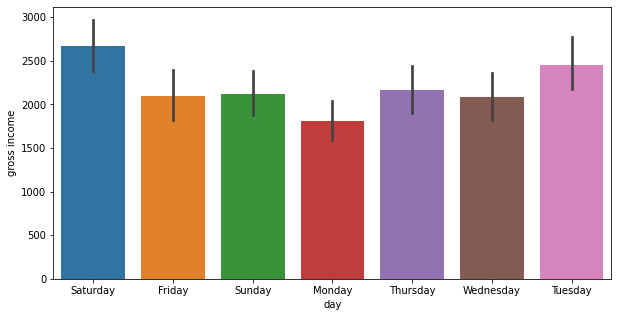

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x="day",y="gross income",estimator=sum,data=df)


### Saturday was the highest gross income day

In [51]:
## which day of the city has more sale
df.groupby(["City","day"])["gross income"].sum().sort_values(ascending=False)

City       day      
Mandalay   Saturday     1013.5440
           Tuesday       898.0590
Naypyitaw  Saturday      860.5225
           Wednesday     845.5150
           Tuesday       841.3235
           Sunday        811.2260
Yangon     Sunday        809.8485
           Saturday      798.3530
Mandalay   Thursday      751.3630
Yangon     Thursday      734.3940
Naypyitaw  Friday        712.6055
Yangon     Tuesday       712.1530
           Friday        692.5650
Mandalay   Friday        686.5600
Yangon     Monday        678.0505
Naypyitaw  Thursday      673.7310
Yangon     Wednesday     631.7965
Mandalay   Monday        606.4145
           Wednesday     605.1235
Naypyitaw  Monday        520.2530
Mandalay   Sunday        495.9680
Name: gross income, dtype: float64

<AxesSubplot:xlabel='day', ylabel='gross income'>

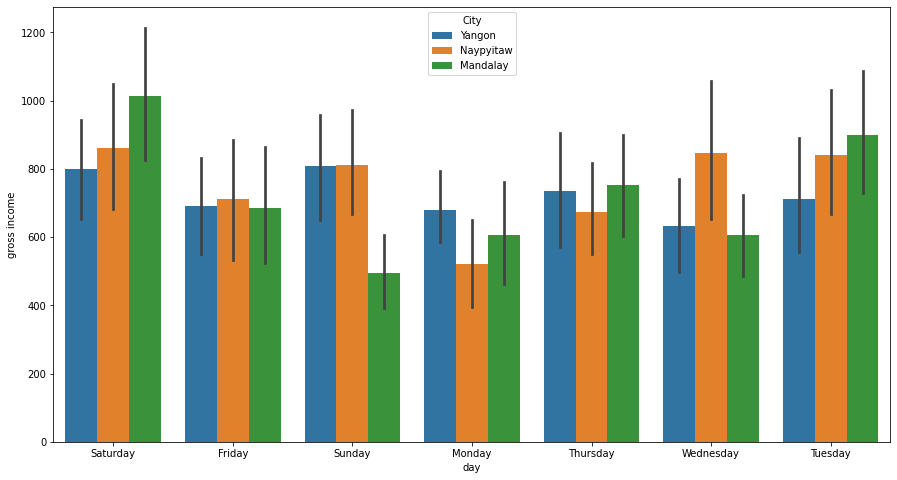

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(x="day",y="gross income",hue="City",estimator=sum,data=df)


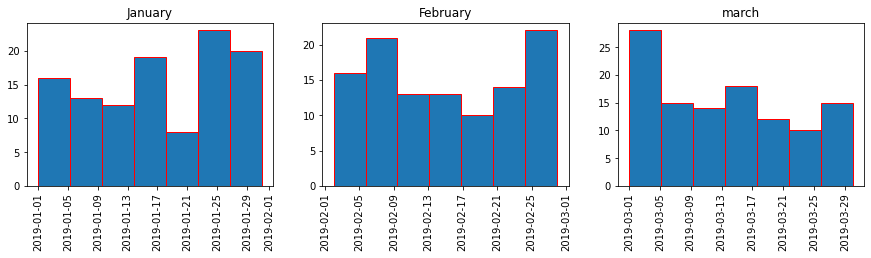

In [53]:
## find out the customer visitng trend of at Mandalay city
plt.figure(figsize = (15,3))
a=df[(df["City"] =="Mandalay")]
a_jan=a[a["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
a_march=a[a["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

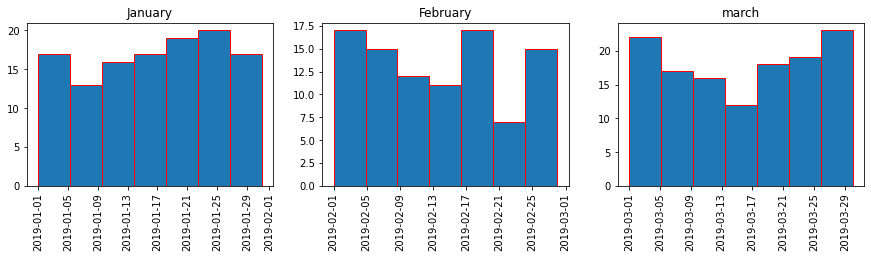

In [54]:
## find out the customer visitng trend of at Yangon city
plt.figure(figsize = (15,3))
b=df[(df["City"] =="Yangon")]
b_jan=b[b["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(b_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
b_feb=b[b["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(b_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
b_march=b[b["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(b_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

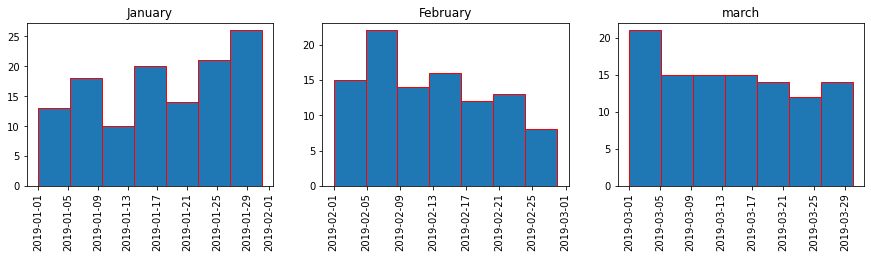

In [55]:
## find out the customer visitng trend of at Naypyitaw city
plt.figure(figsize = (15,3))
c=df[(df["City"] =="Naypyitaw")]
c_jan=c[c["month"]=="January"]
plt.subplot(1,3,1)
plt.hist(c_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
c_feb=c[c["month"]=="February"]
plt.subplot(1,3,2)
plt.hist(c_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("February")
c_march=c[c["month"]=="March"]
plt.subplot(1,3,3)
plt.hist(c_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

In [56]:
## find the city and month wise demand of product line 
df.groupby(["City","month"])["Product line"].value_counts()

City       month     Product line          
Mandalay   February  Fashion accessories       24
                     Electronic accessories    19
                     Sports and travel         19
                     Food and beverages        17
                     Health and beauty         16
                     Home and lifestyle        14
           January   Sports and travel         23
                     Fashion accessories       21
                     Food and beverages        19
                     Electronic accessories    18
                     Health and beauty         16
                     Home and lifestyle        14
           March     Home and lifestyle        22
                     Health and beauty         21
                     Sports and travel         20
                     Electronic accessories    18
                     Fashion accessories       17
                     Food and beverages        14
Naypyitaw  February  Food and beverages        24
      

<AxesSubplot:xlabel='hour', ylabel='count'>

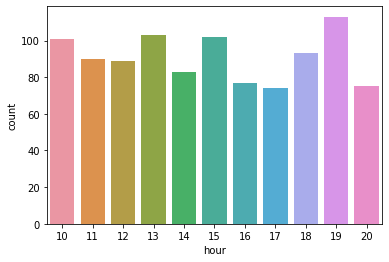

In [57]:
## find the peak hour of the company 
df["hour"]=df["Time"].dt.hour
sns.countplot(x="hour",data=df)

## 7 was the peak time

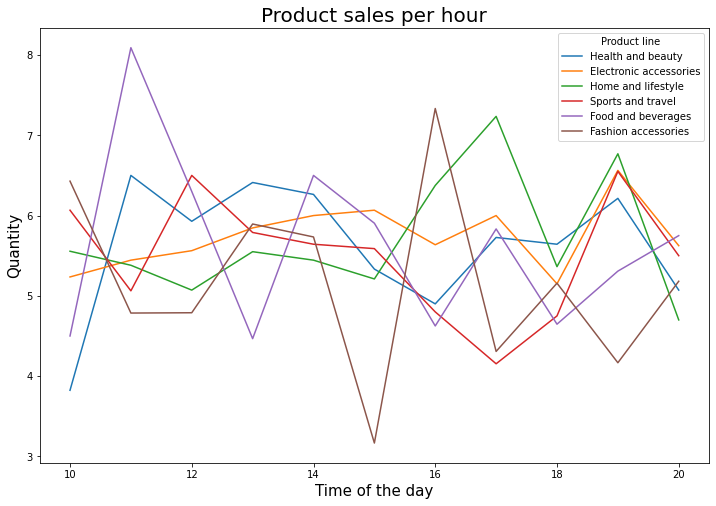

In [58]:
## find the hot seeling time of each item 
plt.figure(figsize=(12,8))
sns.lineplot(x='hour',y='Quantity',data=df, hue='Product line',ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity', fontsize=15);


### Time between 10 to 12 was on the peak  

In [59]:
## how many rating are max, min and average
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

In [60]:
## how many 10 rating are given
print(len(df[df["Rating"]==10.0]), "Customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")


5 Customers had given 10 rating
0.5 % customers had given 10 rating


### Only 0.5 % customers had given 10 star rating

In [61]:
print(len(df[df["Rating"]==4]),"Customers had given 4 rating")
print(len(df[df["Rating"]==4])*100/df["Rating"].count(),"% Customers had given 4 rating")

11 Customers had given 4 rating
1.1 % Customers had given 4 rating


### 1.1 % Customers had given 4 rating


In [62]:
print(len(df[df["Rating"]>6]),"Customers had given below 7 rating")
print(len(df[df["Rating"]>6])*100/df["Rating"].count(),"% Customers had given below 7 rating")

659 Customers had given below 7 rating
65.9 % Customers had given below 7 rating


### 65.9 % Customers had given below 7 rating


In [63]:
df.sample(5)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday,hour
640,Mandalay,Member,Female,Food and beverages,98.79,3,14.8185,311.1885,2019-02-23,2023-01-16 20:00:00,Ewallet,296.37,4.761905,14.8185,6.4,February,Saturday,5,20
881,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,2019-03-30,2023-01-16 12:51:00,Credit card,81.44,4.761905,4.0720,9.5,March,Saturday,5,12
748,Mandalay,Member,Female,Home and lifestyle,12.29,9,5.5305,116.1405,2019-03-26,2023-01-16 19:28:00,Credit card,110.61,4.761905,5.5305,8.0,March,Tuesday,1,19
762,Yangon,Member,Female,Fashion accessories,63.88,8,25.5520,536.5920,2019-01-20,2023-01-16 17:48:00,Ewallet,511.04,4.761905,25.5520,9.9,January,Sunday,6,17
928,Mandalay,Normal,Female,Electronic accessories,88.25,9,39.7125,833.9625,2019-02-15,2023-01-16 20:51:00,Credit card,794.25,4.761905,39.7125,7.6,February,Friday,4,20


<AxesSubplot:xlabel='month', ylabel='gross income'>

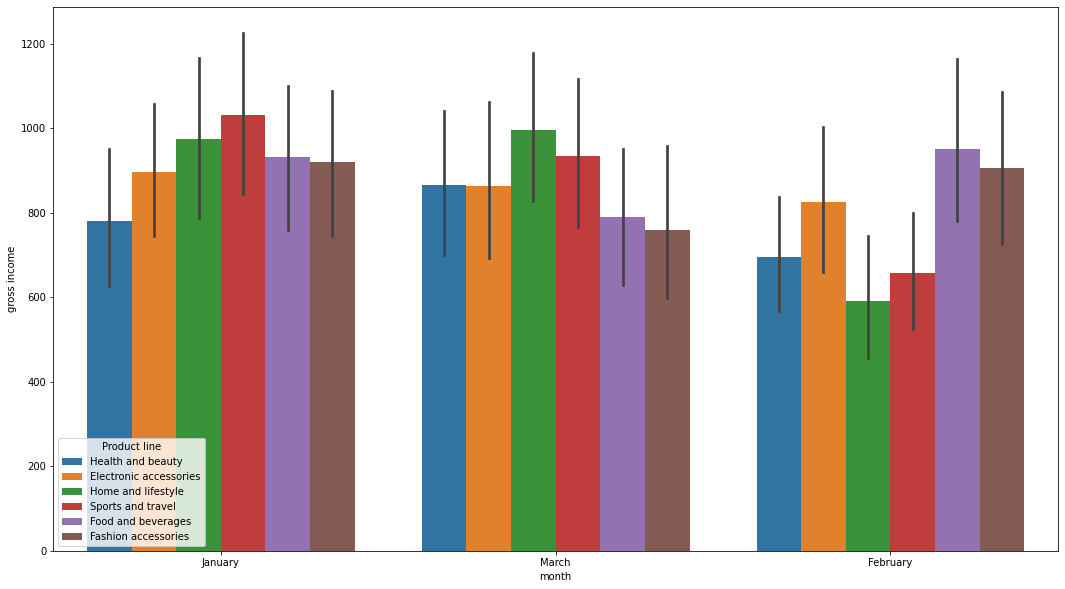

In [64]:
## find the monthly sale of each product 
plt.figure(figsize=(18,10))
sns.barplot(x="month",y="gross income",hue="Product line",data=df,estimator=sum)



In [65]:
## find the product wise sale trend of each city 
df.groupby(["City","Product line"])["gross income"].sum()

City       Product line          
Mandalay   Electronic accessories     811.9735
           Fashion accessories        781.5865
           Food and beverages         724.5185
           Health and beauty          951.4600
           Home and lifestyle         835.6745
           Sports and travel          951.8190
Naypyitaw  Electronic accessories     903.2845
           Fashion accessories       1026.6700
           Food and beverages        1131.7550
           Health and beauty          791.2060
           Home and lifestyle         661.6930
           Sports and travel          750.5680
Yangon     Electronic accessories     872.2435
           Fashion accessories        777.7385
           Food and beverages         817.2905
           Health and beauty          599.8930
           Home and lifestyle        1067.4855
           Sports and travel          922.5095
Name: gross income, dtype: float64

<AxesSubplot:xlabel='City', ylabel='gross income'>

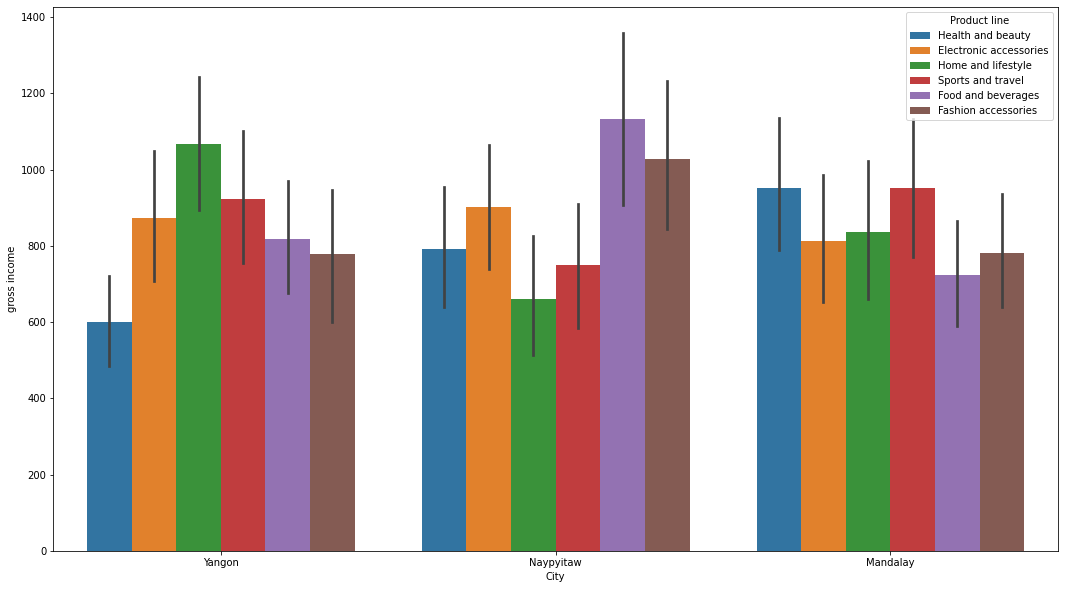

In [66]:
plt.figure(figsize=(18,10))
sns.barplot(x="City",y="gross income",hue="Product line",data=df,estimator=sum)


<AxesSubplot:xlabel='Gender', ylabel='count'>

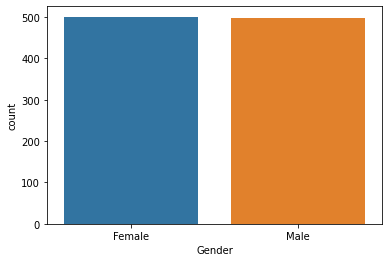

In [67]:
## who contributed more male ya female
sns.countplot(x="Gender",data=df)

### Female contributed more

In [68]:
## find the total gross income of each product by gender 
df.groupby(["Gender","Product line"])["gross income"].sum()

Gender  Product line          
Female  Electronic accessories    1290.5725
        Fashion accessories       1449.4000
        Food and beverages        1579.5675
        Health and beauty          883.8565
        Home and lifestyle        1430.3275
        Sports and travel         1360.7010
Male    Electronic accessories    1296.9290
        Fashion accessories       1136.5950
        Food and beverages        1093.9965
        Health and beauty         1458.7025
        Home and lifestyle        1134.5255
        Sports and travel         1264.1955
Name: gross income, dtype: float64

<AxesSubplot:xlabel='gross income', ylabel='Gender'>

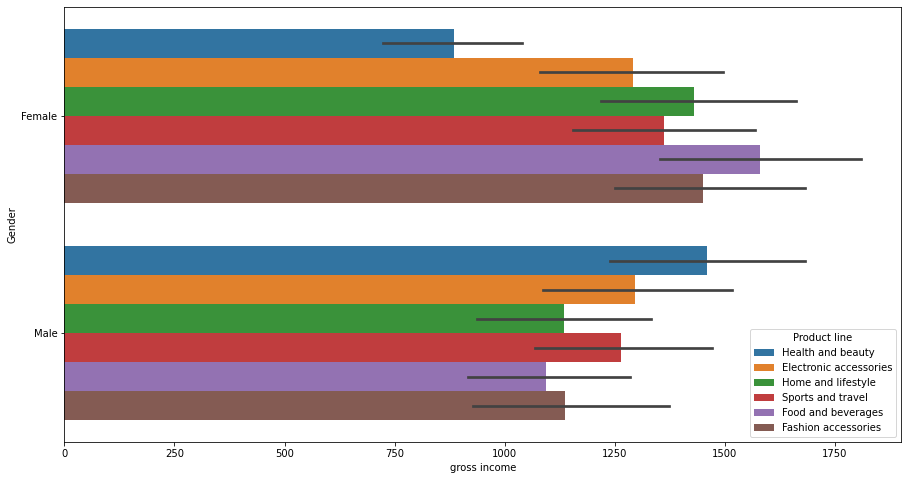

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(x="gross income",y="Gender",hue="Product line",data=df,estimator=sum)

In [70]:
## which city has highest customers
df.groupby("City")["Customer type"].value_counts()

City       Customer type
Mandalay   Normal           167
           Member           165
Naypyitaw  Member           169
           Normal           159
Yangon     Normal           173
           Member           167
Name: Customer type, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

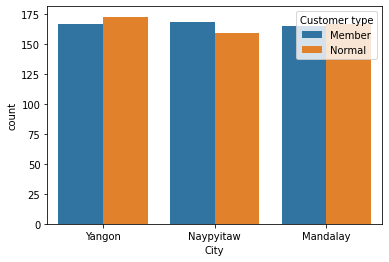

In [71]:
sns.countplot(x="City",hue="Customer type",data=df)

### Yangon has the more customers 

In [72]:
## find the total  gross sale done by each customer type by each city 
df.groupby(["Customer type","City"])["gross income"].sum()

Customer type  City     
Member         Mandalay     2557.3660
               Naypyitaw    2708.6325
               Yangon       2554.1655
Normal         Mandalay     2499.6660
               Naypyitaw    2556.5440
               Yangon       2502.9950
Name: gross income, dtype: float64

<AxesSubplot:xlabel='City', ylabel='gross income'>

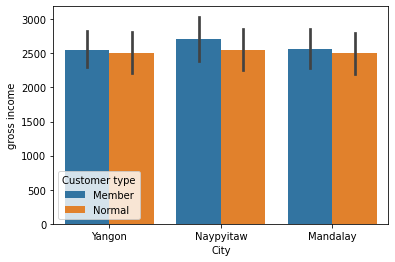

In [73]:
sns.barplot(x="City",y="gross income",hue="Customer type",estimator=sum,data=df)

In [74]:
## which City has highest rating 
df.groupby("City")["Rating"].value_counts()

City      Rating
Mandalay  5.1       10
          6.5       10
          8.9       10
          6.7        9
          7.0        9
                    ..
Yangon    9.4        3
          4.0        2
          5.3        2
          6.3        2
          10.0       1
Name: Rating, Length: 183, dtype: int64

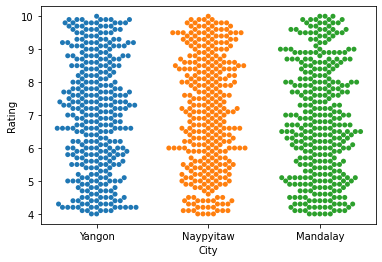

In [75]:
sns.swarmplot(x="City",y="Rating",data=df);

In [76]:
## find the product vise rating or which product most liked by customers
df.groupby("Product line")["Rating"].agg(["max","min","mean"]).sort_values(by="max",ascending=False)

,max,min,mean
Product line,,,
Electronic accessories,10.0,4.0,6.924706
Health and beauty,10.0,4.0,7.003289
Sports and travel,10.0,4.0,6.916265
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218
Home and lifestyle,9.9,4.1,6.837500


In [77]:
## which product most liked by customers by city
df.groupby(["Product line","City"])["Rating"].agg(["max","min","mean"]).sort_values(by="max",ascending=False)

max  min      mean
Product line           City                          
Electronic accessories Mandalay   10.0  4.0  7.116364
Sports and travel      Naypyitaw  10.0  4.0  7.028889
                       Mandalay   10.0  4.1  6.509677
Health and beauty      Yangon     10.0  4.2  6.900000
Food and beverages     Yangon      9.9  4.0  7.253448
Home and lifestyle     Yangon      9.9  4.1  6.930769
Health and beauty      Naypyitaw   9.9  4.1  6.998077
                       Mandalay    9.9  4.0  7.100000
Food and beverages     Naypyitaw   9.9  4.0  7.080303
                       Mandalay    9.9  4.0  6.994000
Fashion accessories    Yangon      9.9  4.0  6.878431
                       Naypyitaw   9.9  4.0  7.440000
                       Mandalay    9.9  4.1  6.722581
Electronic accessories Yangon      9.9  4.3  6.911667
Sports and travel      Yangon      9.9  4.1  7.257627
Electronic accessories Naypyitaw   9.8  4.1  6.747273
Home and lifestyle     Mandalay    9.8  4.1  6.516000
                       Naypyitaw   9.8  4.3  7.060000

<AxesSubplot:xlabel='City', ylabel='Rating'>

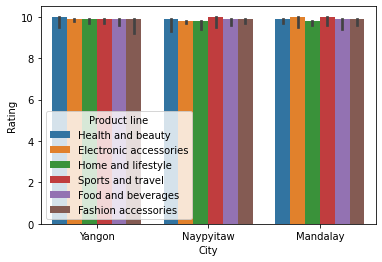

In [78]:
sns.barplot(x="City",y="Rating",hue="Product line",data=df,estimator=max)

In [79]:
## find the number of ewallet, credit cards and cash paying customers
df["Payment"].value_counts()


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

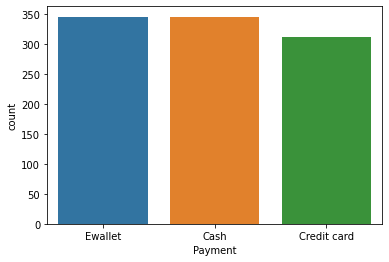

In [80]:
sns.countplot(x="Payment",data=df)

In [81]:
## find the number of ewallet, credit cards and cash paying customers types
df.groupby("Customer type")["Payment"].value_counts()

Customer type  Payment    
Member         Credit card    172
               Cash           168
               Ewallet        161
Normal         Ewallet        184
               Cash           176
               Credit card    139
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

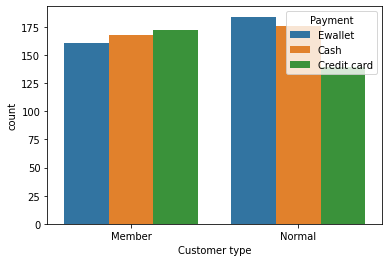

In [82]:
sns.countplot(x="Customer type",hue="Payment",data=df)

In [83]:
## find the number of ewallet, credit cards and cash paying customers at each city 
df.groupby("City")["Payment"].value_counts().sort_values(ascending=False)

City       Payment    
Yangon     Ewallet        126
Naypyitaw  Cash           124
Mandalay   Ewallet        113
           Cash           110
Yangon     Cash           110
Mandalay   Credit card    109
Naypyitaw  Ewallet        106
Yangon     Credit card    104
Naypyitaw  Credit card     98
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

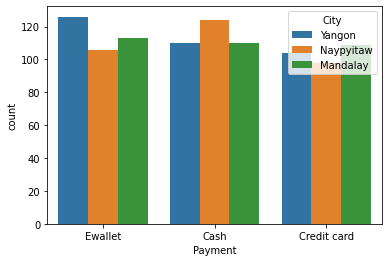

In [84]:
sns.countplot(x="Payment",hue="City",data=df)

In [85]:
## which type of payers leads to more sale
df.groupby("Customer type")["gross income"].sum()

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

<AxesSubplot:xlabel='Customer type', ylabel='gross income'>

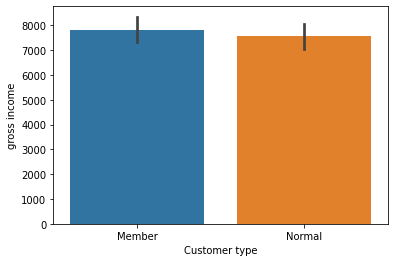

In [86]:
sns.barplot(x="Customer type",y="gross income",data=df,estimator=sum)

# Insights

* Data refer to the month of january february and march
* While the most shopping was done in January,Gross income was highest in this month
* There are almost 50% Members and 50% normal buyers
* Fashion accessories are most populated 
* Yangon has the most customers but Naypyitaw is the city that makes the most Gross income
* Mandalay and Yangon has almost the same Gross income.
* Shopping done by women were more than men .
* Food and beverages are most bought by the Members whereas Electronic accessories were most bought by the Normal
* Food and beverages product line has the maximum gross income 
* E-wallet were the preferred payment method where as there was only slightly difference between E-walled and cash payment.
* While members usually pay by credit card, normal customers shop with e-wallets.
* Men generally buy more health and beauty products
* Women generally Fashion accessories 
* Saturday was the highest gross income day
* Weekdays has more Gross income than weekends
* Weekdays of Naypyitaw city has more gross income than other 3 states
* 7:00 pm was the peak time for the company
* 65.9 % Customers had given below 7 star rating Which will impact the business
* Only 0.5 % customers had given 10 star rating which is way too less